# Intro

This notebook demonstrates the use of the tweeteater functions. The goal of the tweeteater library is to provide functions that allow simple loading of large Twitter datasets collected from the streaming API. It particularly allows to extract nested observations of engagements.

In [1]:
from main import *

# Load some tweets + extract engagements

In [2]:
# the directory with the tweets 
tweet_directory = 'sample_data'
# the extension of the tweet files in the directory
extension = '.jsonl'
# where we want to save output
output_directory = 'sample_output'

At first, we now want to load all tweets in the directory, filter them and extract some attributes. We can filter on two conditions, 1. being that we only keep certain types of tweet, 2. we can provide a custom subsetting function. Regarding 1.: a tweet can be a a) retweet of a tweet, b) a replie to a tweet c) a quote of a tweet or d) just an original tweet, that is a tweet that is neither a) - c). a) - c) are not necessarily mutually exclusive. We decide that we want to keep all tweettypes

In [3]:
keep_tweettypes = ['original', 'retweet', 'reply', 'quote']

We now only want to keep tweets made by certain users, which are in this case political accounts, and hence define a custom subset function that acts directly on the tweet object 

In [4]:
pt = 'sample_data/screenname2party.json'
politicians_screennames = set([scn for scn, party in load_json(pt).items()])
subset_func = lambda tweet: safe_get(tweet, *('user', 'screen_name')) in politicians_screennames

And we want to extract certain attributes: 

In [5]:
attributes = ['created_at', 'user.screen_name', 'user.name', 
              'user.favourites_count', 'text', 'lang']

Now we are ready and can go: 

In [7]:
tweets, engagements =  do_main(tweet_directory=tweet_directory,
                               extension=extension,
                               output_directory=output_directory,
                               keep_tweettypes=keep_tweettypes,
                               subset_func=subset_func, 
                               attributes=attributes)

  0%|          | 0/2 [00:00<?, ?it/s]

Eating tweets...


  0%|          | 0/2 [00:00<?, ?it/s]

Eating engagements...


100%|██████████| 2/2 [00:00<00:00,  4.08it/s]


## Investigate 

...the tweets

In [8]:
tweets.head()

,id,tweettypes,created_at,user.screen_name,user.name,user.favourites_count,text,lang
0,899693900402745345,{original},Mon Aug 21 18:05:16 +0000 2017,PaulSch72969276,Paul Schmidt,7210,#Gruene #SPD #CDU hassen uns #Deutschland #BTW...,de
1,899694525454700544,{original},Mon Aug 21 18:07:45 +0000 2017,CDU,CDU Deutschlands,2249,Gestern waren die Nachbarn auf einen Plausch m...,de
2,899695100439261186,"{quote, retweet}",Mon Aug 21 18:10:02 +0000 2017,AlternativeNRW,Alternative NRW,8376,RT @UdoHemmelgarn: Könnt ihr euch da bitte anm...,de
3,899695144806600704,{retweet},Mon Aug 21 18:10:12 +0000 2017,AlternativeNRW,Alternative NRW,8377,RT @AfD_Bund: Eckpfeiler des #AfD-Programms zu...,de
4,899695178763685893,{quote},Mon Aug 21 18:10:20 +0000 2017,PetraPauMaHe,Petra Pau,7487,Das ist nur ekelhaft! In dieser #BTW17 geht es...,de


...the engagements

In [9]:
engagements.head()

,observed timestamp,observed in tweet.id,tweet.id,engagement type,count,user.screen_name,created_at
0,Mon Aug 21 18:09:14 +0000 2017,899694902233182208,899694525454700544,reply,1,CDU,Mon Aug 21 18:07:45 +0000 2017
1,Mon Aug 21 18:09:17 +0000 2017,899694914077945858,899694525454700544,favourite_count,3,CDU,Mon Aug 21 18:07:45 +0000 2017
2,Mon Aug 21 18:09:17 +0000 2017,899694914077945858,899694525454700544,retweet_count,1,CDU,Mon Aug 21 18:07:45 +0000 2017
3,Mon Aug 21 18:09:18 +0000 2017,899694919178223617,899694525454700544,favourite_count,3,CDU,Mon Aug 21 18:07:45 +0000 2017
4,Mon Aug 21 18:09:18 +0000 2017,899694919178223617,899694525454700544,retweet_count,2,CDU,Mon Aug 21 18:07:45 +0000 2017


...the distribution of tweettypes

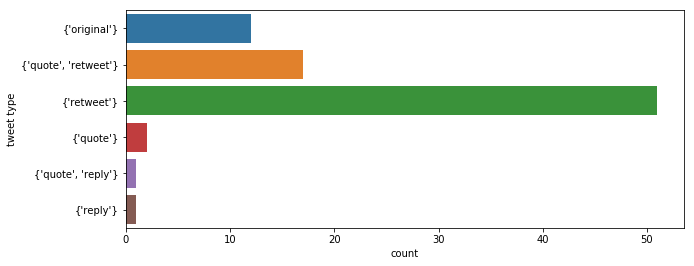

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

tweettypes_df = pd.DataFrame({'tweet type': [str(x) for x in tweets['tweettypes']]})
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.countplot(data=tweettypes_df, y='tweet type', ax=ax)